In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mrjob 
from mrjob.job import MRJob

### Homework 5

Copy this notebook. Rename it as: YOURNAME-HW4-mapreduce-XX

with your name replacing YOURNAME and the xx replaced with the date you submit or copy this HW.

Upload your completed jupyter notebook to elearning site as your homework submission. Do not put this notebook on your github.

Do all the homeworks problems below:
As noted doing the homework gets a 3 out of 5. Extension of homework to to implement an TD-IDF algorithm  (see below)

Use the data/bible+shakes.nonpunc.txt file as the source of you analysis in this homework

##Homework 5.1
 A bigram is the combination of words.  Find the 10 most common bigrams from the text.  Order counts in the bigram combination for example "in the" is not the same bigram as "the in"



Displaying bigrams along with the count

In [ ]:
# %load MRBgram1.py
import re
import heapq
from mrjob.job import MRJob
WORD_RE = re.compile(r"[\w']+")
class MRBgram1(MRJob):
    
    def mapper(self, _, line):
        w = line.split()
        for i in range(len(w)-1):
            yield  [w[i],w[i+1]], 1
            #print (heapq.nlargest(10,bigram_list )) 
            
    def combiner(self,w,counts):
        yield w, sum(counts)
    def reducer(self,w,counts):
        yield w, sum(counts)
            
         
    # ignore this part - its just standard bolierplate for mrjob!
if __name__ == '__main__':
    MRBgram1.run()

In [138]:
%%capture out1
run MRBgram1.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
INFO:mrjob.conf:No configs found; falling back on auto-configuration
Creating temp directory c:\users\asusgo\appdata\local\temp\MRBgram1.AsusGo.20171022.230715.815000
Creating temp directory c:\users\asusgo\appdata\local\temp\MRBgram1.AsusGo.20171022.230715.815000
Creating temp directory c:\users\asusgo\appdata\local\temp\MRBgram1.AsusGo.20171022.230715.815000
Creating temp directory c:\users\asusgo\appdata\local\

In [139]:
with open('output1.txt','w') as f:
    f.write(out1.stdout)

In [140]:
df1 = pd.read_csv("output1.txt", sep='\t', header = None)
df_bigram=(df1.sort_values(1, ascending=False)).head(10)
df_bigram

,0,1
252901,"[""of"", ""the""]",13037
29212,"[""and"", ""the""]",7034
345164,"[""the"", ""lord""]",7017
180556,"[""in"", ""the""]",6738
372817,"[""to"", ""the""]",3799
176157,"[""i"", ""will""]",3470
25184,"[""and"", ""he""]",3020
304625,"[""shall"", ""be""]",3013
17947,"[""all"", ""the""]",2714
175128,"[""i"", ""have""]",2666


## Homework 5.2
Now do the same analysis but make the word order not count "in the" == "the in".  Find the 10 most common ordered bigrams from the alice text.  
 

In [ ]:
# %load MRBgram.py
import re
import heapq
from mrjob.job import MRJob
WORD_RE = re.compile(r"[\w']+")
class MRBgram(MRJob):
    
    def mapper(self, _, line):
        w = line.split()
        for i in range(len(w)-1):
            yield  [w[i],w[i+1]], 1
            #print (heapq.nlargest(10,bigram_list )) 
            
    def combiner(self,w,counts):
        yield sorted(w), sum(counts)
    def reducer(self,w,counts):
        yield sorted(w), sum(counts)
            
         
    # ignore this part - its just standard bolierplate for mrjob!
if __name__ == '__main__':
    MRBgram.run()

In [143]:
%%capture out
run MRBgram.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
INFO:mrjob.conf:No configs found; falling back on auto-configuration
Creating temp directory c:\users\asusgo\appdata\local\temp\MRBgram.AsusGo.20171022.230806.733000
Creating temp directory c:\users\asusgo\appdata\local\temp\MRBgram.AsusGo.20171022.230806.733000
Creating temp directory c:\users\asusgo\appdata\local\temp\MRBgram.AsusGo.20171022.230806.733000
Creating temp directory c:\users\asusgo\appdata\local\tem

In [144]:
with open('output.txt','w') as f:
    f.write(out.stdout)

In [145]:
df = pd.read_csv("output.txt", sep='\t', header = None)
(df.sort_values(1, ascending=False)).head(10)

,0,1
321325,"[""of"", ""the""]",13037
286371,"[""lord"", ""the""]",7244
45829,"[""and"", ""the""]",7034
258205,"[""in"", ""the""]",6739
252752,"[""i"", ""will""]",4100
373435,"[""the"", ""to""]",3799
39496,"[""and"", ""he""]",3129
226609,"[""have"", ""i""]",3123
74052,"[""be"", ""shall""]",3015
30840,"[""am"", ""i""]",2881


## Homework 5.3
A trigram are three word combintation.  Find the 10 most common ordered trigrams from the alice text.  Make it so that the order of the words do not count in the trigram combination for example "in the air" is the same trigram as "the air in" or "air in the"...


In [146]:
%%writefile MRTrigram_sorted.py
import re
from mrjob.job import MRJob
WORD_RE = re.compile(r"[\w']+")
class MRTrigram_sorted(MRJob):
    
    def mapper(self, _, line):
        w = line.split()
        for i in range(len(w)-2):
            yield  [w[i],w[i+1],w[i+2]], 1
            #print (heapq.nlargest(10,bigram_list )) 
            
    def combiner(self,w,counts):
        yield sorted(w), sum(counts)
    def reducer(self,w,counts):
        yield sorted(w), sum(counts)
            
         
    # ignore this part - its just standard bolierplate for mrjob!
if __name__ == '__main__':
    MRTrigram_sorted.run()

Overwriting MRTrigram_sorted.py


In [147]:
%%capture out2
run MRTrigram_sorted.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
INFO:mrjob.conf:No configs found; falling back on auto-configuration
Creating temp directory c:\users\asusgo\appdata\local\temp\MRTrigram_sorted.AsusGo.20171022.230845.683000
Creating temp directory c:\users\asusgo\appdata\local\temp\MRTrigram_sorted.AsusGo.20171022.230845.683000
Creating temp directory c:\users\asusgo\appdata\local\temp\MRTrigram_sorted.AsusGo.20171022.230845.683000
Creating temp directory c:\use

Reading the content of a captured object is stored in a file then that file is read as a dataframe and top ten trigrams are displayed.

In [148]:
with open('Trigram_output.txt','w') as f:
    f.write(out2.stdout)
    
df2 = pd.read_csv("Trigram_output.txt", sep='\t', header = None)
df_trigram=(df2.sort_values(1, ascending=False)).head(10)
df_trigram

,0,1
734688,"[""lord"", ""of"", ""the""]",2053
369974,"[""children"", ""of"", ""the""]",1794
650597,"[""house"", ""of"", ""the""]",1581
793389,"[""of"", ""son"", ""the""]",1523
165431,"[""and"", ""lord"", ""the""]",1187
718823,"[""land"", ""of"", ""the""]",1025
735112,"[""lord"", ""saith"", ""the""]",866
788616,"[""of"", ""out"", ""the""]",855
156975,"[""and"", ""i"", ""will""]",813
793461,"[""of"", ""sons"", ""the""]",762


# 5.4 Plotting graph for observing frequency count of monograms,bigrams and trigrams

Program for displaying monograms which is used in monogram graph ploting

In [149]:
%%writefile MRMonogram_sorted.py
import re
from mrjob.job import MRJob
WORD_RE = re.compile(r"[\w']+")
class MRMonogram_sorted(MRJob):
    
    def mapper(self, _, line):
        w = line.split()
        for i in range(len(w)-2):
            yield  [w[i]], 1
            #print (heapq.nlargest(10,bigram_list )) 
            
    def combiner(self,w,counts):
        yield sorted(w), sum(counts)
    def reducer(self,w,counts):
        yield sorted(w), sum(counts)
            
         
    # ignore this part - its just standard bolierplate for mrjob!
if __name__ == '__main__':
    MRMonogram_sorted.run()

Overwriting MRMonogram_sorted.py


In [150]:
%%capture out3
run MRMonogram_sorted.py data/bible+shakes.nopunc.txt

No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
No configs found; falling back on auto-configuration
INFO:mrjob.conf:No configs found; falling back on auto-configuration
Creating temp directory c:\users\asusgo\appdata\local\temp\MRMonogram_sorted.AsusGo.20171022.230945.843000
Creating temp directory c:\users\asusgo\appdata\local\temp\MRMonogram_sorted.AsusGo.20171022.230945.843000
Creating temp directory c:\users\asusgo\appdata\local\temp\MRMonogram_sorted.AsusGo.20171022.230945.843000
Creating temp directory c:\

In [151]:
with open('Monogram_output.txt','w') as f:
    f.write(out3.stdout)
    
df3 = pd.read_csv("Monogram_output.txt", sep='\t', header = None)
df_monogram=(df3.sort_values(1, ascending=False)).head(10)
df_monogram

,0,1
32215,"[""the""]",82272
6953,"[""and""]",73297
24063,"[""of""]",45526
32675,"[""to""]",28991
18916,"[""i""]",27581
32203,"[""that""]",23109
19183,"[""in""]",21418
5984,"[""a""]",19312
17959,"[""he""]",15807
16031,"[""for""]",15109


Pie graph for diaplaying bigram frequency count of top ten bigrams

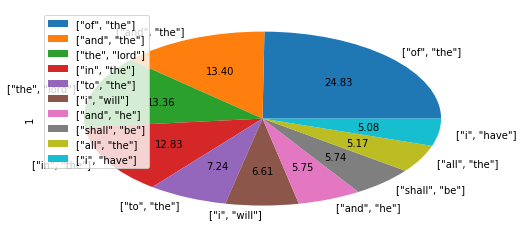

In [152]:
import matplotlib.pyplot as plt
df_bigram.plot.pie(subplots=True, autopct='%.2f',labels=df_bigram[0], figsize=(8, 4))
plt.show()

Pie graph for diaplaying trigram frequency count of top ten trigrams

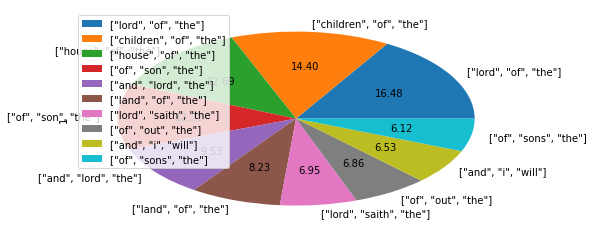

In [153]:
import matplotlib.pyplot as plt
df_trigram.plot.pie(subplots=True,autopct='%.2f', labels=df_trigram[0], figsize=(8, 4))
plt.show()

Pie graph for diaplaying monogram frequency count of top ten monograms

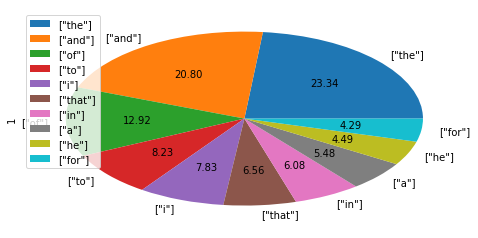

In [154]:

df_monogram.plot.pie(subplots=True, autopct='%.2f',labels=df_monogram[0], figsize=(8, 4))
plt.show()

## For greater than a score of 3 
###  Create a TD - IDF implementation and 
### Analyze the following Sherlock Holmes book from Project Gutenberg text versions of :
The Adventures of Sherlock Holmes-  http://www.gutenberg.org/ebooks/1661.txt.utf-8

A Study in Scarlet - http://www.gutenberg.org/files/244/244-0.txt

The Hound of the Baskervilles - http://www.gutenberg.org/files/2852/2852-0.txt

The Return of Sherlock Holmes - http://www.gutenberg.org/files/108/108-0.txt

The Sign of the Four - http://www.gutenberg.org/ebooks/2097.txt.utf-8

### Display the scores for the top 20 highest frequencty terms and the relationship to the books



References:

https://pythonhosted.org/mrjob/

https://stackoverflow.com/questions/26352572/mapreduce-python-bigrams

https://stackoverflow.com/questions/22138230/mapreduce-how-to-keep-track-of-states-across-multiple-lines-in-the-mapper-say

https://www.digitalocean.com/community/tutorials/how-to-graph-word-frequency-using-matplotlib-with-python-3

https://stackoverflow.com/questions/40870854/mapreduce-job-to-yield-top-10-values-using-pythons-mrjob

https://stackoverflow.com/questions/30690619/python-histogram-using-matplotlib-on-top-words

https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html

https://stackoverflow.com/questions/30139243/saving-a-variable-in-a-text-file


